In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\spam.csv',encoding='latin-1')

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Data Cleaning

In [ ]:
df.describe()

In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True,axis=1)

In [11]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace = True)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [15]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [17]:
df= df.drop_duplicates(keep='first')

In [19]:
df.shape

(5169, 2)

In [20]:
#EDA

In [21]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

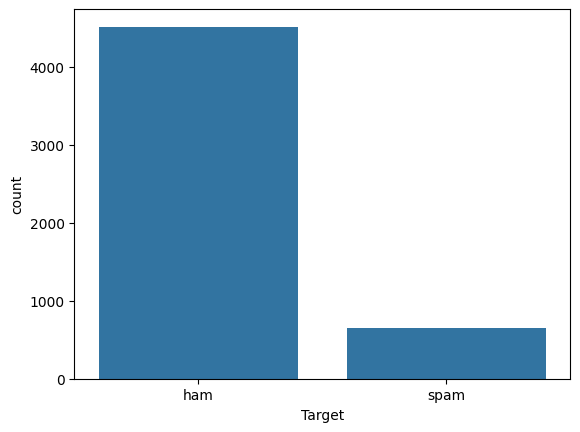

In [24]:
sns.countplot(data=df,x='Target')
plt.xticks(ticks=[0,1],labels=['ham','spam'])
plt.show()

In [31]:
!pip install nltk

DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python312\lib\site-packages\einops-0.8.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python312\lib\site-packages\huggingface_hub-0.23.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python312\lib\site-packages\inflect-7.3.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\hp\appdata

In [ ]:
#text preprocessing

In [33]:
import nltk

In [26]:
df['num_characters'] = df['Text'].apply(len)

In [27]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
import nltk
nltk.download('punkt_tab')  # Downloads the Punkt tokenizer models

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [40]:
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [41]:
df['num_sentence']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [42]:
df.head()

,Target,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
df[df['Target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
df[df['Target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

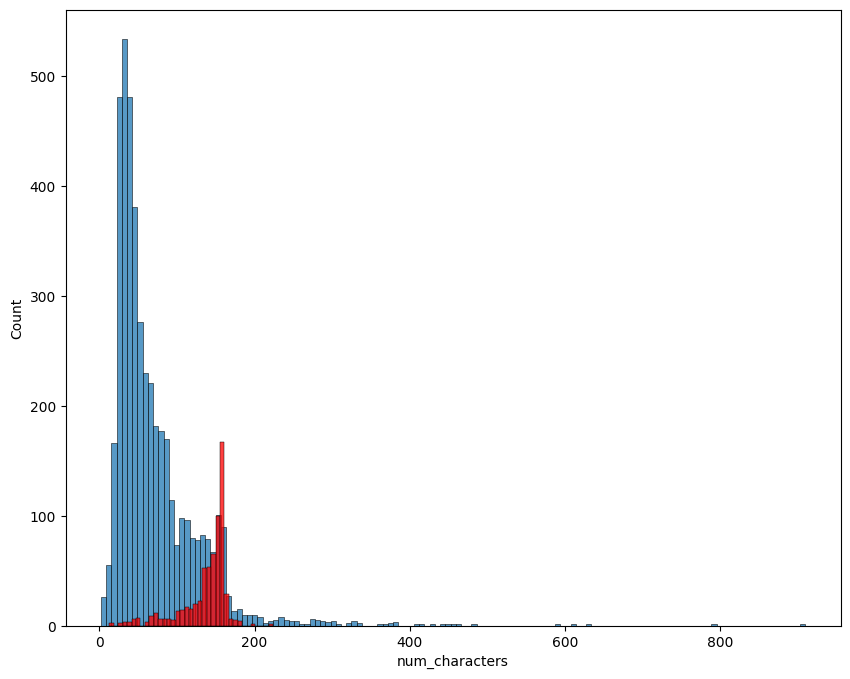

In [49]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: >

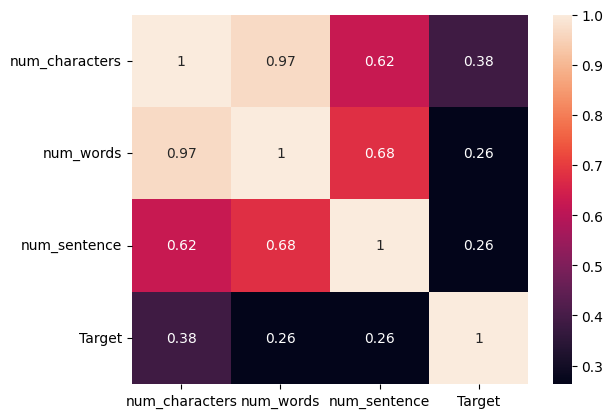

In [51]:
sns.heatmap(df[['num_characters','num_words','num_sentence','Target']].corr(),annot=True)

In [74]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('English') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    

In [76]:
transform_text('hi How Are you Sathwika? I loved you always')

'hi sathwika love alway'

In [55]:
from nltk.corpus import stopwords

In [62]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [77]:
df['Tranformed_text'] = df['Text'].apply(transform_text)

In [78]:
df.head()

,Target,Text,num_characters,num_words,num_sentence,Tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [81]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 131.3 kB/s eta 0:00:03
   -- ------------------------------------ 20.5/301.2 kB 131.3 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/301.2 kB 178.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.2 kB 178.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.2 kB 178.6 kB/s eta 0:00:02
   --------------- ---------------------- 122.9/301.2 kB 359.9 kB/s eta 0:00:01
   -------------------------------------  297.0/301.2 kB 796.4 kB/s eta 0:00:01
   -------------------------------------  297.0/301.2 kB 796.4 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 664.3 kB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python312\lib\site-packages\einops-0.8.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python312\lib\site-packages\huggingface_hub-0.23.4-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python312\lib\site-packages\inflect-7.3.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\hp\appdata

In [82]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size=10,background_color = 'white')

In [84]:
spam_wc = wc.generate(df[df['Target']==1]['Tranformed_text'].str.cat(sep=" "))

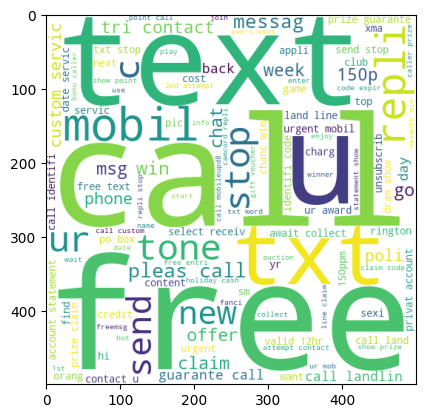

In [85]:
plt.imshow(spam_wc)

In [86]:
Ham_wc = wc.generate(df[df['Target']==0]['Tranformed_text'].str.cat(sep=" "))

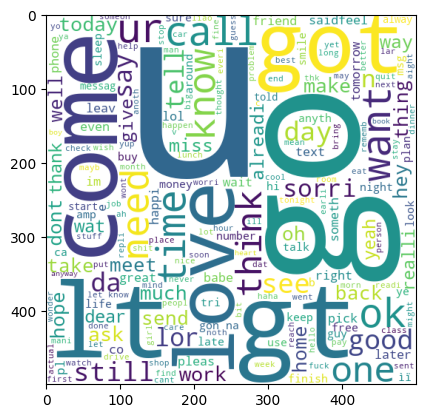

In [87]:
plt.imshow(Ham_wc)

In [88]:
spam_words = []
for msg in df[df['Target']==1]['Tranformed_text'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [99]:
Ham_words = []
for msg in df[df['Target']==0]['Tranformed_text'].tolist():
    for word in msg.split():
        Ham_words.append(word)

In [100]:
from collections import Counter
word_count = Counter(spam_words).most_common(30)
df1 = pd.DataFrame(data=word_count,columns=['Word','Count'])

In [101]:
Ham_word_count = Counter(Ham_words).most_common(30)
df2 = pd.DataFrame(data=Ham_word_count,columns=['Word','Count'])

In [102]:
df2

,Word,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

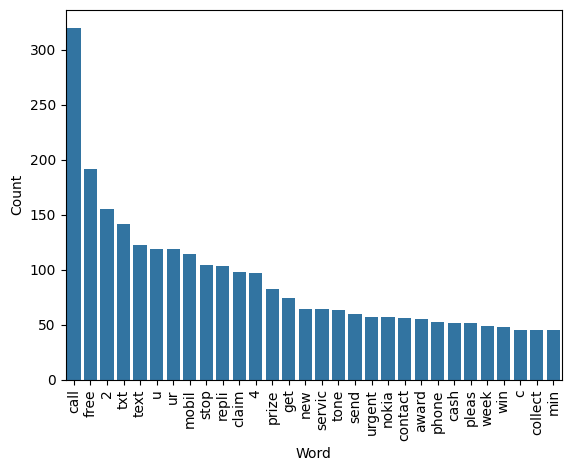

In [97]:
sns.barplot(data = df1,x='Word',y='Count')
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

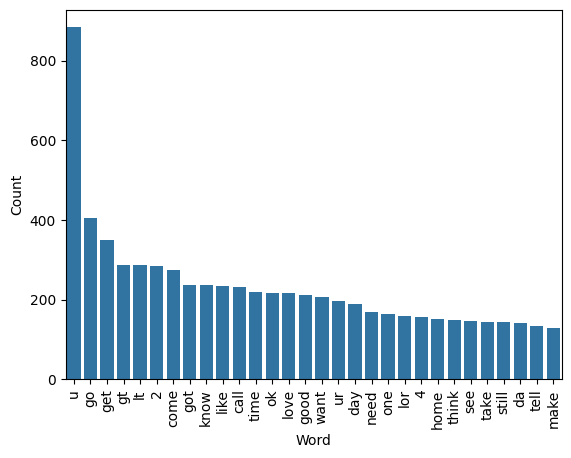

In [104]:
sns.barplot(data = df2,x='Word',y='Count')
plt.xticks(rotation='vertical')

In [105]:
#model Building

In [148]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
CV = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [149]:
X = tfidf.fit_transform(df['Tranformed_text']).toarray()

In [150]:
y = df['Target'].values

In [151]:
X.shape

(5169, 3000)

In [152]:
y.shape

(5169,)

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [155]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [156]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [157]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8529980657640233
0.44871794871794873


In [160]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
0.9900990099009901


In [159]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748549323017408
0.9553571428571429


In [161]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))